In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'':
  os.chdir(r'')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\kerry\AppData\Local\Temp\ipykernel_9816\3609341226.py:20: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



{"C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap_external.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\codecs.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\aliases.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\__init__.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\utf_8.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\cp1252.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\abc.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\io.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\li

In [2]:
from scipy.optimize import fsolve
import numpy as np
from scipy.stats import norm

def callBS(S, K, T, sigma, r, q=0):
    d1 = np.log(S/K) + (r-q+0.5*sigma**2)*T
    d1 /= sigma*np.sqrt(T)
    d2 = d1 - sigma*np.sqrt(T)
    N1 = norm.cdf(d1)
    N2 = norm.cdf(d2)
    return np.exp(-q*T)*S*N1 - np.exp(-r*T)*K*N2

def callIV(C, S, K, T, r, q=0):
  return fsolve(
    lambda x: C - callBS(S, K, T, x, r, q),
    x0=0.3
  )

C = 15
S = 100
K = 100
T = 1
r = 0.05
iv = callIV(C, S, K, T, r)
iv[0]

0.32025830955048284

In [3]:
import yfinance as yf
tick = yf.Ticker('aapl')
price = tick.history()["Close"].iloc[-1].round(2)
rounded = int(5*round(price/5, 0))

In [4]:
price

154.31

In [5]:
import pandas as pd
calls = tick.option_chain("2023-04-21").calls
calls = calls.set_index("strike")
puts = tick.option_chain("2023-04-21").puts
puts = puts.set_index("strike")
calls = calls.loc[rounded-15:rounded+15]
ser1 = calls["impliedVolatility"]
ser2 = puts["impliedVolatility"].loc[rounded-15:rounded+15]
df = pd.concat((ser1, ser2), axis=1)
df.columns = ["Call IV", "Put IV"]
calls

,contractSymbol,lastTradeDate,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
strike,,,,,,,,,,,,,
140.0,AAPL230421C00140000,2023-03-06 19:19:26+00:00,16.35,16.35,16.55,2.520001,18.221262,530,15042,0.344977,True,REGULAR,USD
145.0,AAPL230421C00145000,2023-03-06 19:27:00+00:00,12.20,12.35,12.50,2.300000,23.232327,1277,11887,0.320563,True,REGULAR,USD
150.0,AAPL230421C00150000,2023-03-06 19:29:00+00:00,8.70,8.65,8.80,2.000000,29.850748,6217,35170,0.294624,True,REGULAR,USD
155.0,AAPL230421C00155000,2023-03-06 19:30:24+00:00,5.75,5.70,5.80,1.660000,40.586792,8707,44191,0.277351,False,REGULAR,USD
160.0,AAPL230421C00160000,2023-03-06 19:31:39+00:00,3.37,3.35,3.40,1.170000,53.181810,9072,43762,0.258186,False,REGULAR,USD
165.0,AAPL230421C00165000,2023-03-06 19:31:03+00:00,1.76,1.76,1.78,0.700000,66.037750,7794,27696,0.243660,False,REGULAR,USD
170.0,AAPL230421C00170000,2023-03-06 19:30:26+00:00,0.82,0.82,0.84,0.360000,78.260870,9342,39456,0.234139,False,REGULAR,USD


In [6]:
df

,Call IV,Put IV
strike,,
140.0,0.344977,0.281257
145.0,0.320563,0.264900
150.0,0.294624,0.249641
155.0,0.277351,0.234871
160.0,0.258186,0.219856
165.0,0.243660,0.205452
170.0,0.234139,0.193001


In [7]:
tick = yf.Ticker('tsla')
price = tick.history()["Close"].iloc[-1].round(2)
rounded = int(5*round(price/5, 0))
calls = tick.option_chain("2023-04-21").calls
calls = calls.set_index("strike")
puts = tick.option_chain("2023-04-21").puts
puts = puts.set_index("strike")
calls = calls.loc[rounded-15:rounded+15]
ser1 = calls["impliedVolatility"]
ser2 = puts["impliedVolatility"].loc[rounded-15:rounded+15]
df = pd.concat((ser1, ser2), axis=1)
df.columns = ["Call IV", "Put IV"]
df

,Call IV,Put IV
strike,,
180.00,0.670658,0.627140
183.33,0.666629,0.621403
185.00,0.665287,0.621830
190.00,0.654728,0.613651
191.67,0.654483,0.611149
195.00,0.650211,0.605412
200.00,0.640751,0.603336
205.00,0.639835,0.594059
208.33,0.637516,0.589238


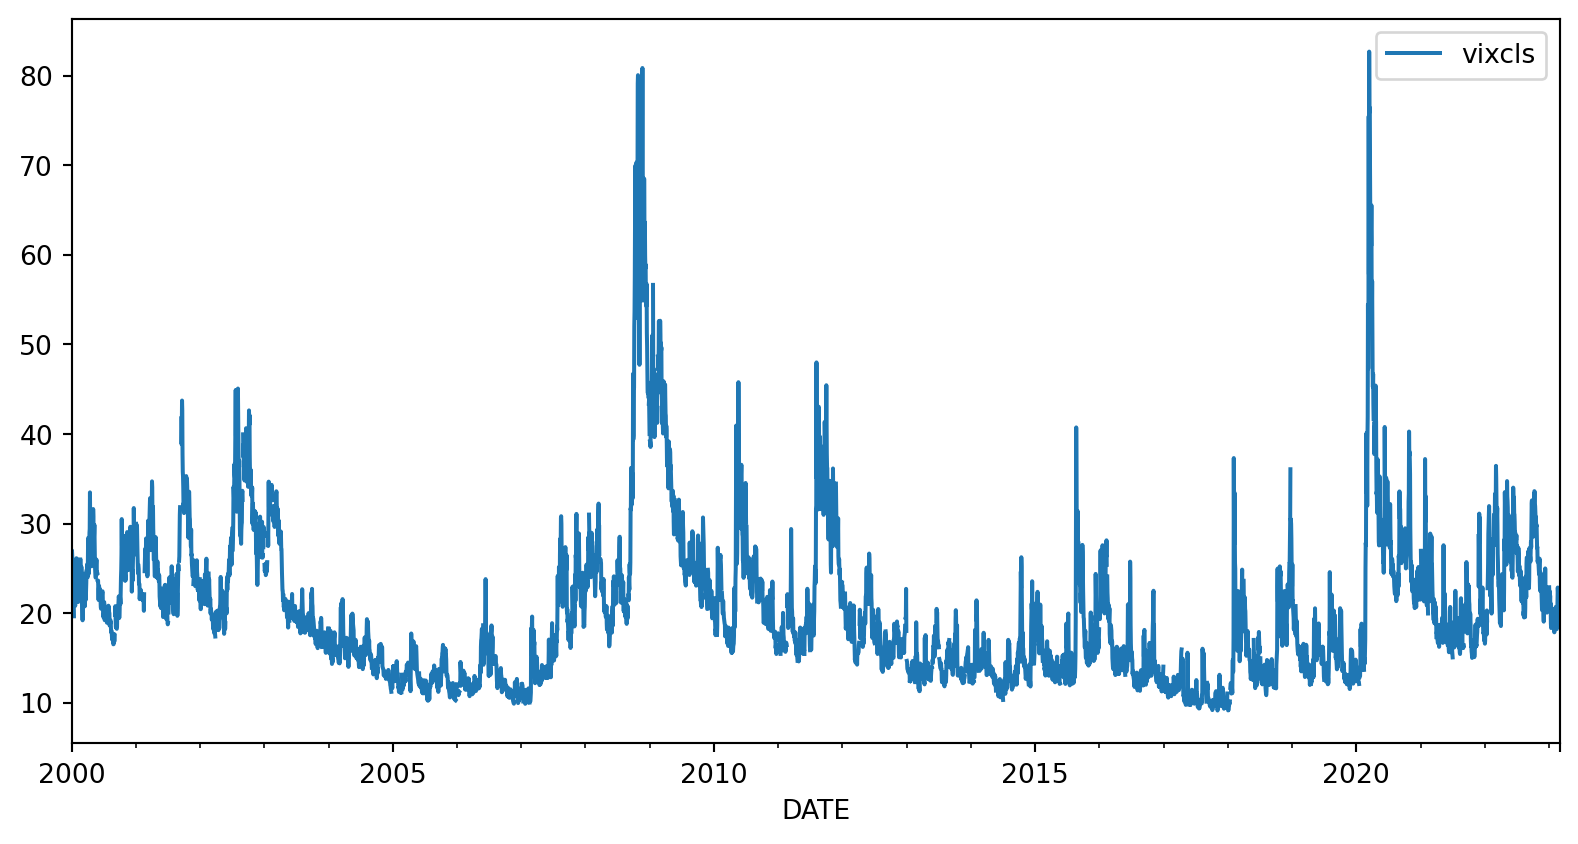

In [8]:
from pandas_datareader import DataReader as pdr
vix = pdr('vixcls', 'fred', start=2000)
_ = vix.plot()